# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
from datetime import datetime, timedelta

In [3]:
import yfinance as yf

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [74]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')

In [75]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)

In [76]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [130]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


In [42]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2018-01-02 00:00:00-05:00 to 2023-11-22 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1484 non-null   float64
 1   High          1484 non-null   float64
 2   Low           1484 non-null   float64
 3   Close         1484 non-null   float64
 4   Volume        1484 non-null   int64  
 5   Dividends     1484 non-null   float64
 6   Stock Splits  1484 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 92.8 KB


In [43]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2018-01-02 00:00:00-05:00 to 2023-11-22 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1484 non-null   float64
 1   High          1484 non-null   float64
 2   Low           1484 non-null   float64
 3   Close         1484 non-null   float64
 4   Volume        1484 non-null   int64  
 5   Dividends     1484 non-null   float64
 6   Stock Splits  1484 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 92.8 KB


# 2. Pre-processing

In [44]:
# 选择闭市价
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 

Text(0.5, 1.0, ' Google Percentage Return')

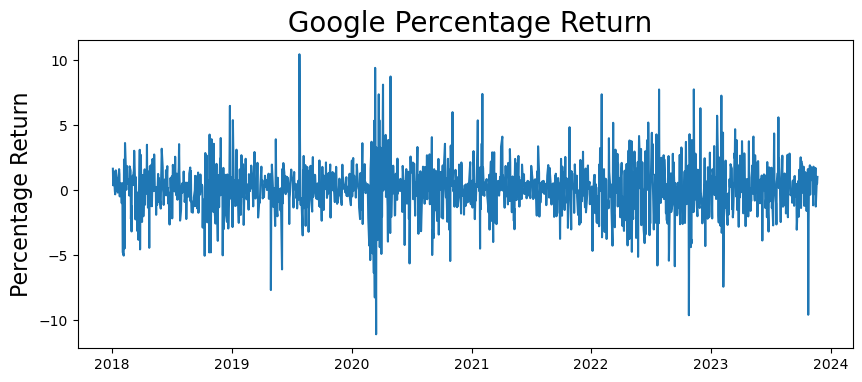

In [45]:
plt.figure(figsize=(10,4))
plt.plot(g_returns)
plt.ylabel('Percentage Return', fontsize=16)
plt.title(' Google Percentage Return', fontsize=20)

Text(0.5, 1.0, ' MicroSoft Percentage Return')

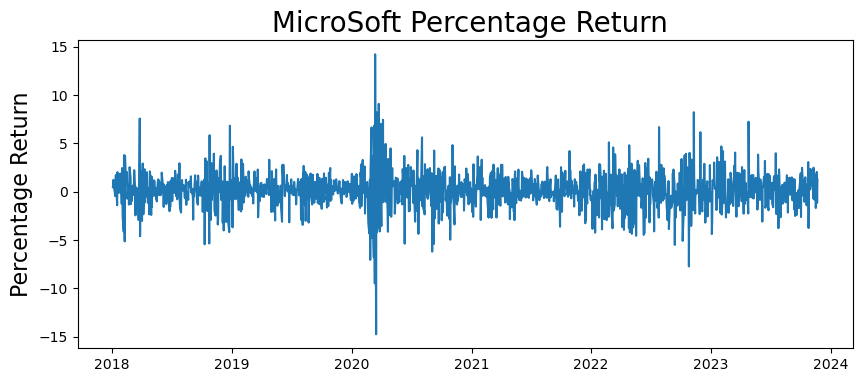

In [46]:
plt.figure(figsize=(10,4))
plt.plot(ms_returns)
plt.ylabel('Percentage Return', fontsize=16)
plt.title(' MicroSoft Percentage Return', fontsize=20)

## Stationarity Check

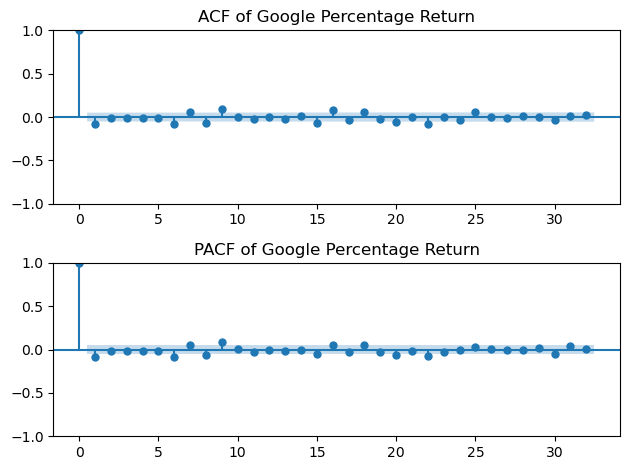

In [47]:
fig, axs = plt.subplots(2)

plot_acf(g_returns, ax=axs[0])
axs[0].set_title('ACF of Google Percentage Return')
plot_pacf(g_returns, ax=axs[1])
axs[1].set_title('PACF of Google Percentage Return')

plt.tight_layout()
plt.show()

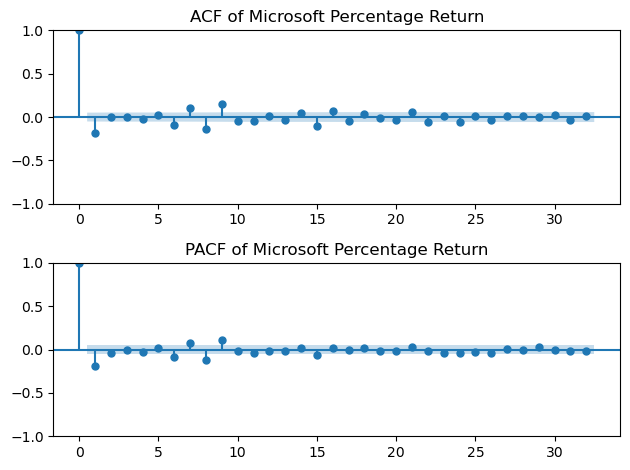

In [48]:
fig, axs = plt.subplots(2)

plot_acf(ms_returns, ax=axs[0])
axs[0].set_title('ACF of Microsoft Percentage Return')
plot_pacf(ms_returns, ax=axs[1])
axs[1].set_title('PACF of Microsoft Percentage Return')

plt.tight_layout()
plt.show()

### Decomposition

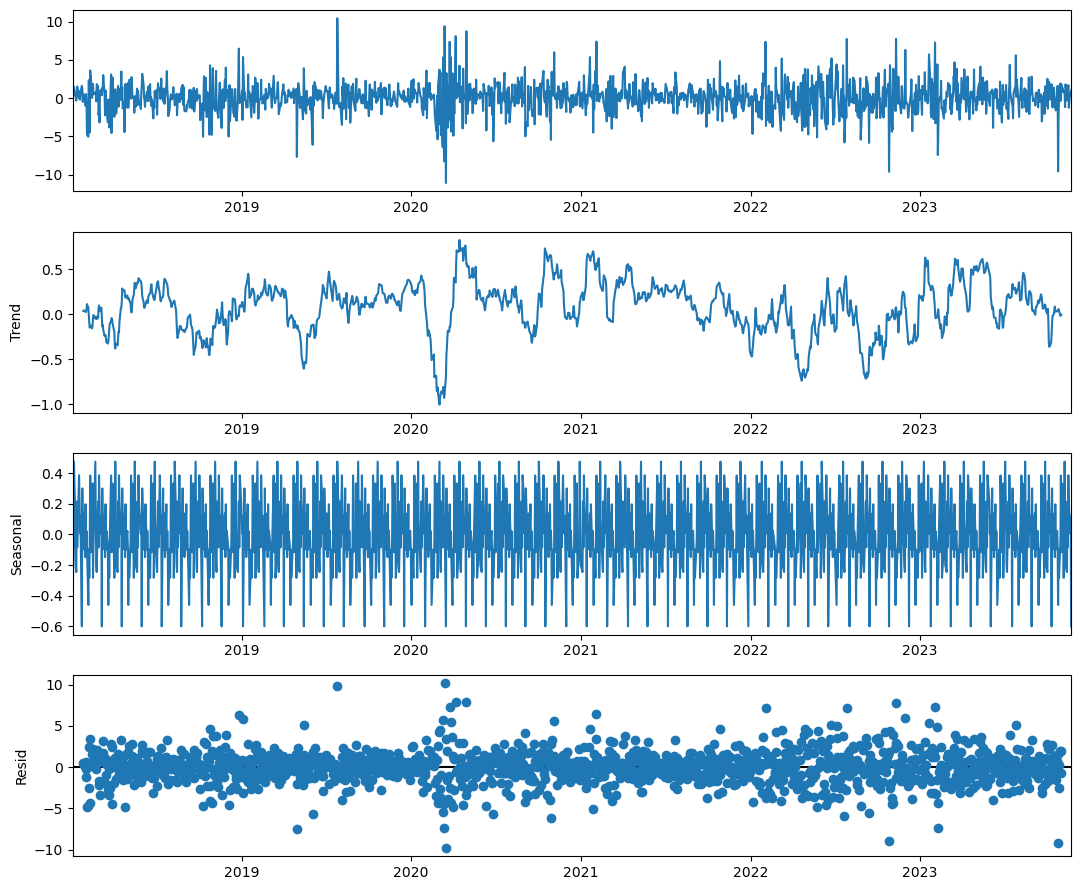

In [66]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

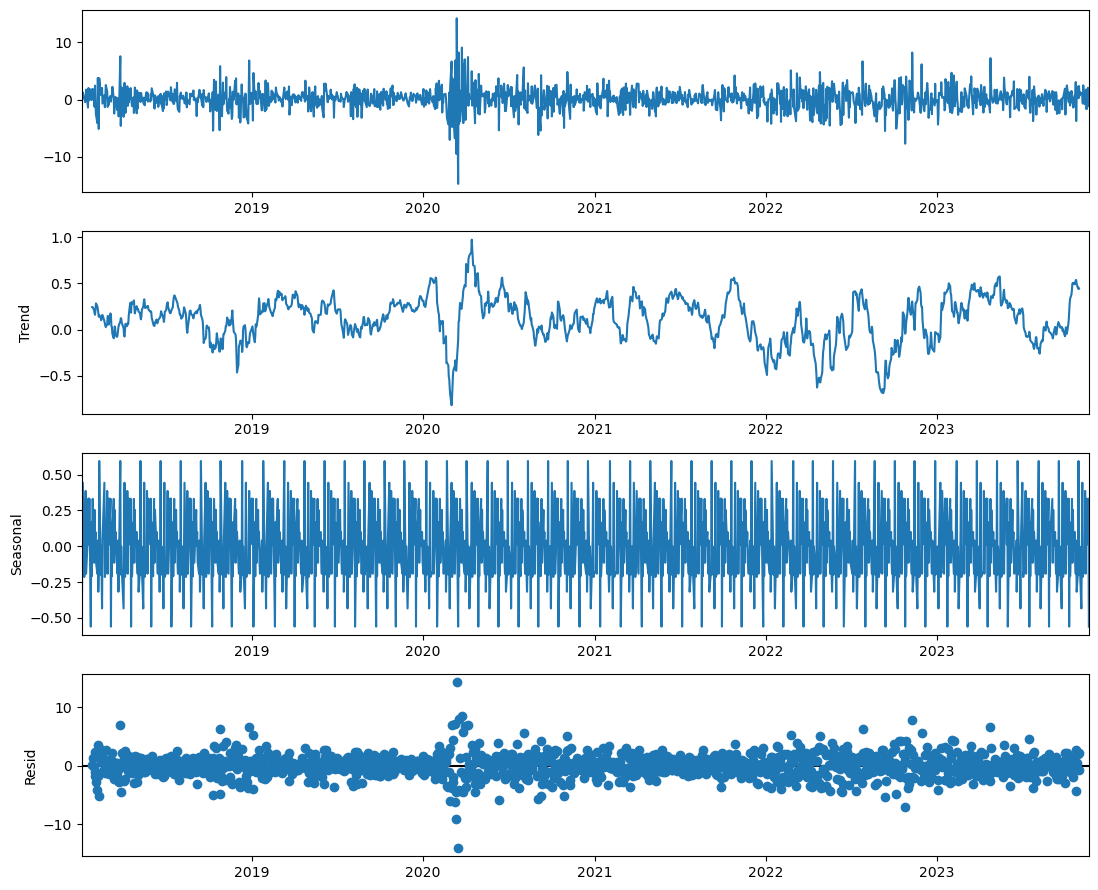

In [70]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### The Augmented Dickey-Fuller test

In [68]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_returns)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -9.414402e+00
p-value                        5.720638e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.461000e+03
Critical Value (1%)           -3.434834e+00
Critical Value (5%)           -2.863520e+00
Critical Value (10%)          -2.567824e+00
dtype: float64

In [69]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [71]:
msft_adftest = adfuller(ms_returns)
msft_adf_results= pd.Series(msft_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in msft_adftest[4].items():
    msft_adf_results['Critical Value (%s)'%key] = value
msft_adf_results

Test Statistic                -1.291610e+01
p-value                        3.963064e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [72]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

## Granger Casuality Check

In [63]:
# As the data is stationary, so we can now conduct Granger Casuality Check

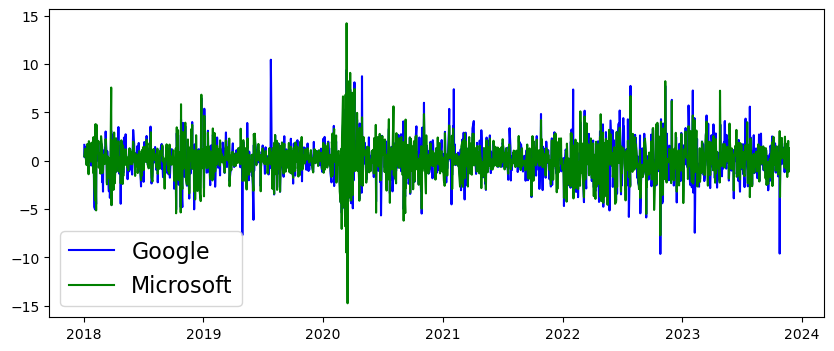

In [49]:
plt.figure(figsize=(10,4))
plt.plot(g_returns, color='b')
plt.plot(ms_returns, color='g')

plt.legend(['Google', 'Microsoft'], fontsize=16)

In [50]:
from statsmodels.tsa.stattools import grangercausalitytests

In [60]:
# Extract the values from dataframes ms_returns and g_returns to get ready for the Granger Casualtiy Check
ms=ms_returns.values
goo=g_returns.values

In [61]:
                                 # 果         因     检查Google的股价是否受microsoft影响（causal）
gc_check = pd.DataFrame(columns=['Google', 'Microsoft'], data=zip(ms,goo))
gc_check.head()

,Google,Microsoft
0,[0.465386437920845],[1.641315585570724]
1,[0.8801372417393871],[0.362129819522905]
2,[1.2398266042391803],[1.457106215021109]
3,[0.10203119843237296],[0.427316143828782]
4,[-0.06795763961452428],[-0.0614313271785738]


In [83]:
gc_check = gc_check.astype(float)
gc_check.head()

,Google,Microsoft
0,0.465386,1.641316
1,0.880137,0.362130
2,1.239827,1.457106
3,0.102031,0.427316
4,-0.067958,-0.061431


In [86]:
# To determin the number of lags needed for the test

model = VAR(gc_check)
aic=[]
for i in range(30):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  1.7689415025136672
BIC :  1.7760916337909942
FPE :  5.86464236799606
HQIC:  1.7716067053536126 

Lag Order = 1
AIC :  1.7362051013409985
BIC :  1.7576672382068124
FPE :  5.67576361713667
HQIC:  1.7442053569642644 

Lag Order = 2
AIC :  1.740575428244861
BIC :  1.776365251433705
FPE :  5.700623070913087
HQIC:  1.7539169422912444 

Lag Order = 3
AIC :  1.7382131051011664
BIC :  1.7883463234353651
FPE :  5.687172761471981
HQIC:  1.7569020946377483 

Lag Order = 4
AIC :  1.7418565165449333
BIC :  1.8063488670038883
FPE :  5.707932174406749
HQIC:  1.765899210094746 

Lag Order = 5
AIC :  1.7402439266090894
BIC :  1.8191111743987913
FPE :  5.698736458310279
HQIC:  1.7696465641798766 

Lag Order = 6
AIC :  1.7391062529488555
BIC :  1.832364191571615
FPE :  5.692258888840899
HQIC:  1.7738750860619237 

Lag Order = 7
AIC :  1.7392998842209386
BIC :  1.8469643355453376
FPE :  5.693363986622202
HQIC:  1.7794411759400994 

Lag Order = 8
AIC :  1.7320887611771003
BIC :  1.85417

In [92]:
# lag=9时有最小的AIC

In [84]:
gc_res = grangercausalitytests(gc_check, 30) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9030  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9030  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.0146  , p=0.9927  , df=2
likelihood ratio test: chi2=0.0146  , p=0.9927  , df=2
parameter F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=10.0865 , p=0.0178  , df=3
likelihood ratio test: chi2=10.0523 , p=0.0181  , df=3
parameter F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4461  , p=0.

ssr based F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=51.3336 , p=0.0090  , df=30
likelihood ratio test: chi2=50.4476 , p=0.0111  , df=30
parameter F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30


# 3. Fit VAR model

In [94]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 9.

data=gc_check
model = VAR(data)
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, Nov, 2023
Time:                     12:50:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.86105
Nobs:                     1474.00    HQIC:                   1.77543
Log likelihood:          -5416.00    FPE:                    5.60985
AIC:                      1.72452    Det(Omega_mle):         5.46797
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.148315         0.049517            2.995           0.003
L1.Google           -0.167354         0.040106           -4.173           0.000
L1.Microsoft         0.001045         0.038187            0.027

### DW-Test of the residuals

In [97]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(gc_check.columns, out):
    print(col, ':', round(val, 4))


Google : 1.9943
Microsoft : 1.9998


# 4. Forecast

In [102]:
data=gc_check

1483

In [117]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(data))
train, test = data[0:-nobs], data[-nobs:]

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
dtypes: float64(2)
memory usage: 21.0 KB


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 1335 to 1482
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


## Simple Forecast

In [120]:
lag_order = model_fitted.k_ar
print(lag_order)

9


In [121]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[ 0.23336122, -0.84809791],
       [ 2.23993126,  2.82265842],
       [-1.27656626,  1.17385767],
       [ 0.92961269, -2.7772711 ],
       [-0.1488879 , -1.22157061],
       [ 0.02774311, -0.09513518],
       [-0.81124765,  0.83794031],
       [-0.12231476,  0.00944489],
       [-1.39627865,  0.82144754]])

In [122]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=data.index[-nobs:], columns=data.columns )
forecast

,Google,Microsoft
1335,0.164652,0.150856
1336,0.660883,0.528901
1337,-0.475765,-0.522009
1338,0.294279,0.109547
1339,0.076764,-0.146174
...,...,...
1478,0.121543,0.081732
1479,0.121543,0.081732
1480,0.121543,0.081732
1481,0.121543,0.081732


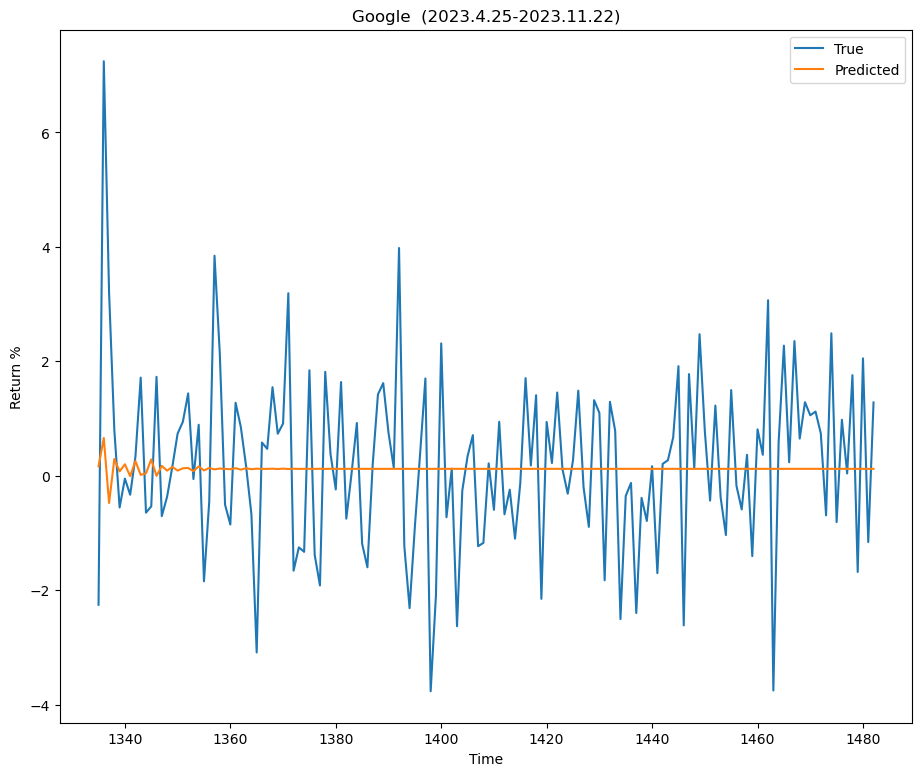

In [131]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

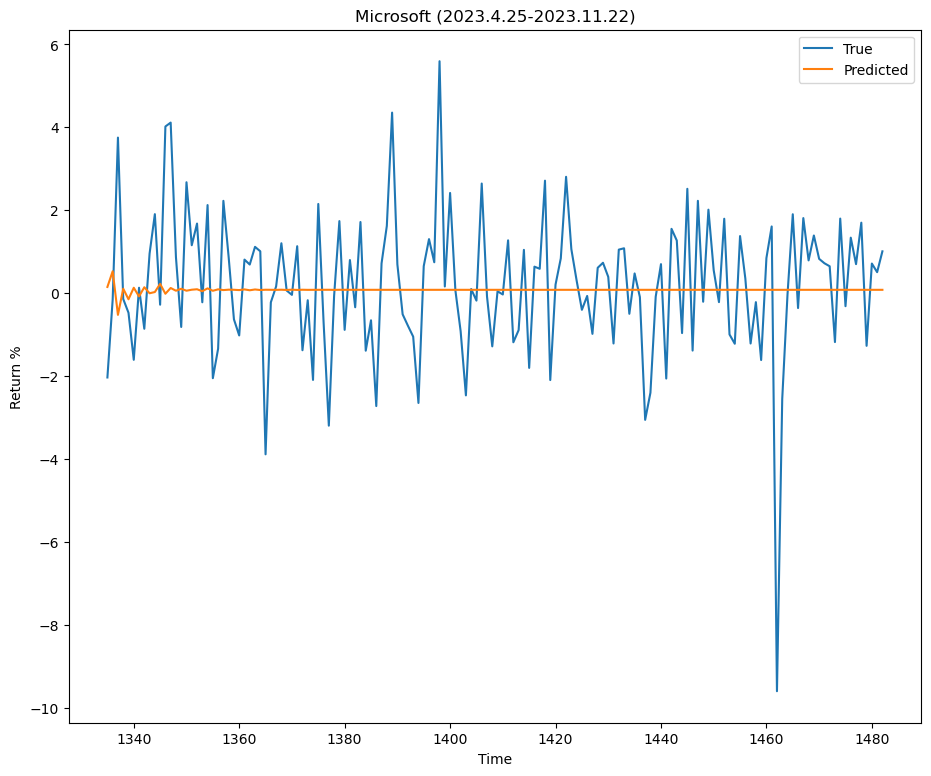

In [132]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [135]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [137]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  2.3658
rmse :  1.5381

Forecast Accuracy of: Microsoft
mse :  3.092
rmse :  1.7584


## Rolling Forecast

In [160]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = data[:-(test_size-i)]  
    
    forecast_input = train.values[-9:]
    
    model = VAR(train)
    model_fitted = model.fit(9)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=data.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [161]:
rolling_predictions.index = range(1335, 1483)
rolling_predictions

,Google,Microsoft
1335,0.227386,0.180413
1336,1.019850,0.746891
1337,-1.686680,-1.482446
1338,-0.609790,-0.698326
1339,0.517708,0.217988
...,...,...
1478,0.040914,0.121816
1479,-0.031825,0.124574
1480,0.052183,-0.087843
1481,0.203017,0.245155


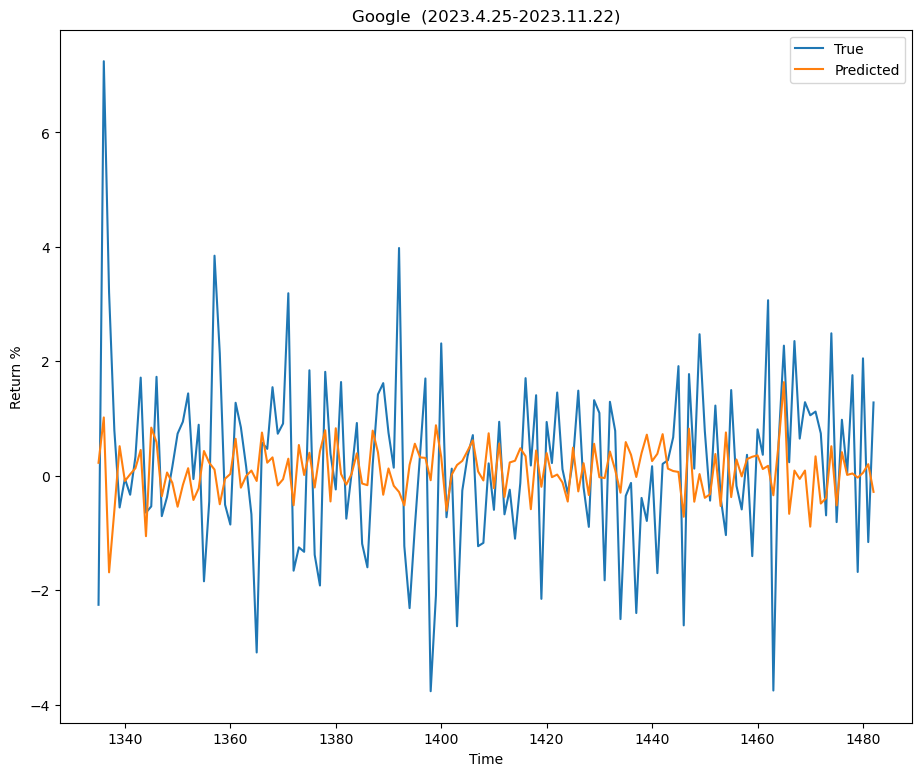

In [162]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

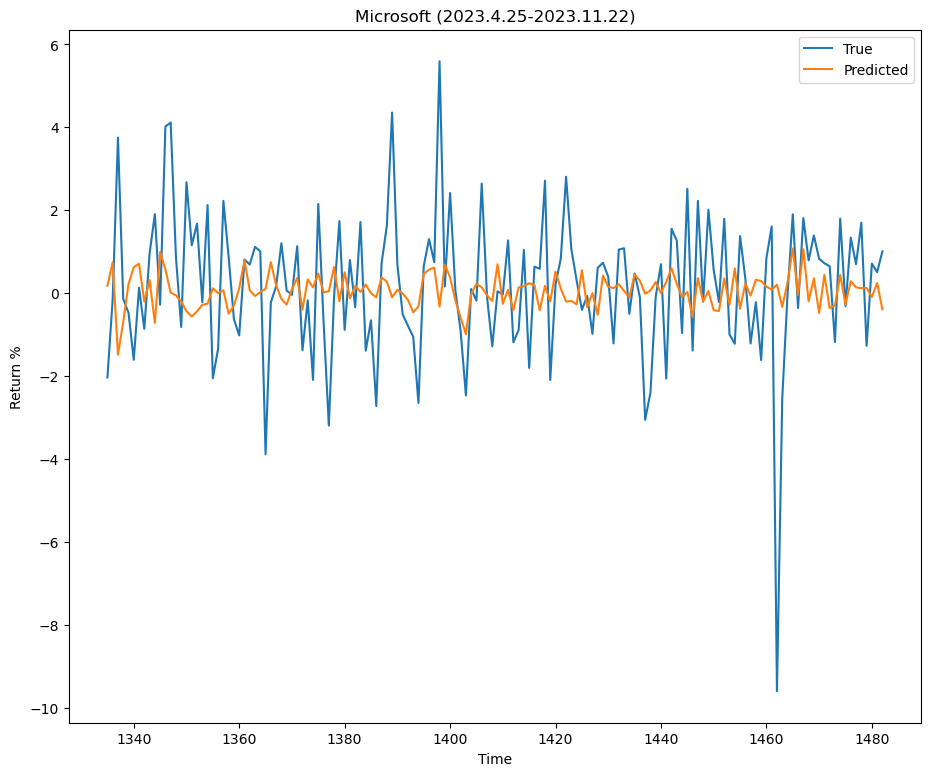

In [164]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [165]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
mse :  2.3784
rmse :  1.5422

 Rolling Forecast Accuracy of: Microsoft
mse :  3.1741
rmse :  1.7816


In [168]:
# 从图像看明显rolling forecast更准确， 但从mse看差不多？